In [1]:
from glob import glob
import os
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example: read data from multi-files

In [2]:
# get path and filenames​
path = '/mnt/tacco-ns1004k-cmroot/'
files=list(glob(path+"NorESM2-LM/historical/v20230616/tos_Omon*"))

In [3]:
# sort files so they appear by year/month​
files.sort()

In [4]:
files

['/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_185001-185912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_186001-186912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_187001-187912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_188001-188912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_189001-189912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_190001-190912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_191001-191912.nc',
 '/mnt/tacco-ns1004k-cmroot/NorESM2-LM/historical/v20230616/tos_Omon_NorESM2-LM_historical_r1i1p4f1_gn_192001-192912.nc',
 '/mnt/tacco-ns1004k-cmr

In [5]:
# combine multiple datafiles into one dataset
dm = xr.open_mfdataset(files, combine='by_coords')  

In [6]:
dm

<xarray.Dataset>
Dimensions:             (time: 1980, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(120, 385, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               tos
    variant_label:             r1i1p4f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.6.0
    tracking_id:               hdl:21.14100/b5f48d2e-9409-42c5-b4db-25ce8ed2de72

### Example: regional selection of gn ungridded data

In [7]:
# select the first file name
file1 = files[0]

In [10]:
# select region in one data file
ds1 = xr.open_dataset(file1)
tos1 = ds1.tos.where((ds1.longitude > 190) & (ds1.longitude <240) &  (ds1.latitude > -40) & (ds1.latitude < 40),drop=True)
tos1

<xarray.DataArray 'tos' (time: 120, j: 181, i: 50)>
array([[[19.060644 , 18.972252 , 18.909428 , ..., 17.395786 ,
         17.390902 , 17.355284 ],
        [19.45819  , 19.452246 , 19.419815 , ..., 18.06986  ,
         18.056042 , 18.049265 ],
        [19.997126 , 20.062004 , 20.06967  , ..., 18.699055 ,
         18.728018 , 18.791544 ],
        ...,
        [11.978269 , 12.180442 , 12.209757 , ...,        nan,
                nan,        nan],
        [11.175175 , 11.3659   , 11.429586 , ...,        nan,
                nan,        nan],
        [10.562364 , 10.67748  , 10.721594 , ...,        nan,
                nan,        nan]],

       [[20.498941 , 20.435503 , 20.39164  , ..., 18.536974 ,
         18.567493 , 18.68094  ],
        [20.870539 , 20.86297  , 20.86057  , ..., 19.189934 ,
         19.253157 , 19.415422 ],
        [21.25005  , 21.303036 , 21.359585 , ..., 19.92185  ,
         20.01513  , 20.207973 ],
...
        [16.00256  , 16.11706  , 16.206774 , ...,        nan,
                nan,        nan],
        [15.069077 , 15.262566 , 15.328903 , ...,        nan,
                nan,        nan],
        [14.160119 , 14.398229 , 14.475254 , ...,        nan,
                nan,        nan]],

       [[17.574343 , 17.545145 , 17.517424 , ..., 16.38622  ,
         16.265429 , 16.251062 ],
        [17.948357 , 17.865376 , 17.818588 , ..., 16.832901 ,
         16.791674 , 16.843204 ],
        [18.311768 , 18.212328 , 18.137787 , ..., 17.284851 ,
         17.283363 , 17.33152  ],
        ...,
        [14.370613 , 14.337882 , 14.197275 , ...,        nan,
                nan,        nan],
        [13.586811 , 13.561296 , 13.4555   , ...,        nan,
                nan,        nan],
        [12.879999 , 12.88324  , 12.834419 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1859-12-16 12:00:00
  * j          (j) int32 98 99 100 101 102 103 104 ... 273 274 275 276 277 278
  * i          (i) int32 301 302 303 304 305 306 307 ... 345 346 347 348 349 350
    latitude   (j, i) float64 -39.65 -39.65 -39.65 -39.65 ... 39.64 39.64 39.64
    longitude  (j, i) float64 190.5 191.5 192.5 193.5 ... 237.5 238.5 239.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  sst
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2023-06-26T10:35:42Z altered by CMOR: Converted type from...

In [11]:
# add more selected data in other files 
for i in range(1,len(files)):
    ds2 = xr.open_dataset(files[i])
    tmp = ds2.tos.where((ds2.longitude > 190) & (ds2.longitude <240) & (ds2.latitude > -40) & (ds2.latitude < 40),drop=True)
    tos1=xr.combine_by_coords([tos1,tmp],combine_attrs="override")

In [12]:
# Get DataArray from Dataset
tos=tos1.tos
tos

<xarray.DataArray 'tos' (time: 1980, j: 181, i: 50)>
array([[[19.060644 , 18.972252 , 18.909428 , ..., 17.395786 ,
         17.390902 , 17.355284 ],
        [19.45819  , 19.452246 , 19.419815 , ..., 18.06986  ,
         18.056042 , 18.049265 ],
        [19.997126 , 20.062004 , 20.06967  , ..., 18.699055 ,
         18.728018 , 18.791544 ],
        ...,
        [11.978269 , 12.180442 , 12.209757 , ...,        nan,
                nan,        nan],
        [11.175175 , 11.3659   , 11.429586 , ...,        nan,
                nan,        nan],
        [10.562364 , 10.67748  , 10.721594 , ...,        nan,
                nan,        nan]],

       [[20.498941 , 20.435503 , 20.39164  , ..., 18.536974 ,
         18.567493 , 18.68094  ],
        [20.870539 , 20.86297  , 20.86057  , ..., 19.189934 ,
         19.253157 , 19.415422 ],
        [21.25005  , 21.303036 , 21.359585 , ..., 19.92185  ,
         20.01513  , 20.207973 ],
...
        [18.018217 , 17.884808 , 17.745123 , ...,        nan,
                nan,        nan],
        [17.2091   , 17.12111  , 16.9854   , ...,        nan,
                nan,        nan],
        [16.435146 , 16.376322 , 16.215971 , ...,        nan,
                nan,        nan]],

       [[17.704468 , 17.79093  , 17.923662 , ..., 16.324932 ,
         16.256298 , 16.091448 ],
        [18.204853 , 18.18645  , 18.283611 , ..., 16.978474 ,
         16.856985 , 16.68226  ],
        [18.878534 , 18.912254 , 18.917309 , ..., 17.632307 ,
         17.522182 , 17.38088  ],
        ...,
        [15.8947525, 15.794566 , 15.698095 , ...,        nan,
                nan,        nan],
        [15.200257 , 15.171241 , 15.09878  , ...,        nan,
                nan,        nan],
        [14.610572 , 14.623771 , 14.561346 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * j          (j) int32 98 99 100 101 102 103 104 ... 273 274 275 276 277 278
  * i          (i) int32 301 302 303 304 305 306 307 ... 345 346 347 348 349 350
    latitude   (j, i) float64 -39.65 -39.65 -39.65 -39.65 ... 39.64 39.64 39.64
    longitude  (j, i) float64 190.5 191.5 192.5 193.5 ... 237.5 238.5 239.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  sst
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2023-06-26T10:35:42Z altered by CMOR: Converted type from...

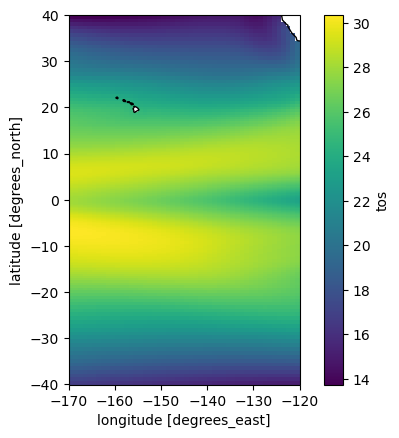

In [13]:
# simple plot of the selected region
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
tos.mean(dim="time").plot.pcolormesh(ax=ax, x="longitude", y="latitude")
ax.coastlines()
ax.set_yticks(np.arange(-40,41,10))
ax.set_xticks(-(360-np.arange(190,241,10)))
plt.show()

In [15]:
# calculate region mean
tos_nino34 = tos.mean(dim=['j','i'])

In [16]:
tos_nino34

<xarray.DataArray 'tos' (time: 1980)>
array([25.538094, 25.679417, 25.876225, ..., 26.638952, 26.72908 ,
       26.879887], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00